<a href="https://colab.research.google.com/github/torchroh/Deep-learning/blob/main/D2L_2_4_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 Calculus


---
그래프 그리기~ 미분미분


In [ ]:
import numpy as np
from matplotlib_inline import backend_inline
import torch
import matplotlib.pyplot as plt

# 2.4.1 Derivatives and Differentiation


---
h를 0에 수렴하는 값으로 제공해서 기울기를 구하는 형태 --> 미분

In [ ]:
def f(x) :
    return 3 * x ** 2 - 4 * x

In [ ]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


# 2.4.2 Visualization Utilities

In [ ]:
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

setting figure size

In [ ]:
def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_axes 함수는 properties, including labels, ranges, scales와 axes를 연결할 수 있다.

In [ ]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

위의 3가지 함수를 사용하면, 여러 곡선을 정의할 수 있다.

(아래 코드는 입력의 크기와 모양이 일치하는지 확인하는 것)

In [ ]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

f(x)의 접선 y = 2x - 3, 접점은 x = 1, 접선의 기울기는 2

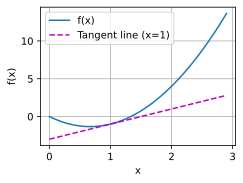

In [ ]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 2.4.3 Partial Derivatives and Gradients (편미분과 기울기)

---

딥러닝에는 함수 안에 여러 변수가 들어있는 경우도 다뤄야 함.

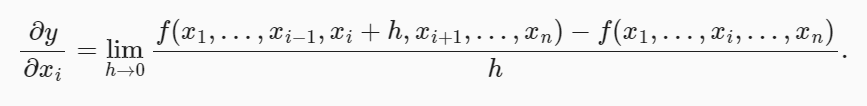

여러 x들 중에 xi만 변수로 보고 미분

multivariate function의 모든 변수에 대해 미분을 연결하면 함수의 gradient를 얻을 수 있다.
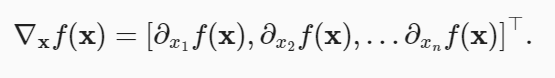

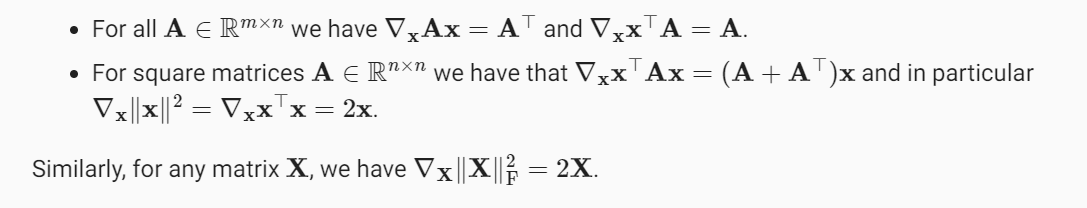



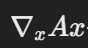

 벡타와 행렬의 곱을 x에 대해 미분하는 것.


 --> 행렬과 벡터의 기울기 계산을 보여주고 있음.


# 2.4.4 Chain Rule


---

딥러닝에서 다루는 gradient는 함수(함수(함수...와 같이 중첩된 함수이기 때문에 구하기 힘든 경우가 있다.

이를 해결하기 위한 것이 Chain Rule

y = f(g(x)), y = f(u), u = g(x)

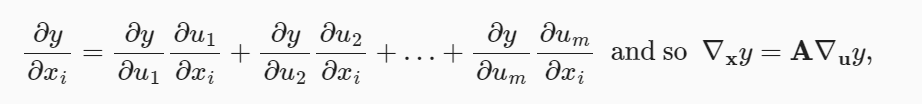